
# Tarefa 4

## Otimização de Tratamento de Pacientes com Diabetes usando Aprendizado por Reforço.

Desenvolver um agente de aprendizado por reforço que recomenda ações aos pacientes diabéticos para controlar seus níveis de glicose ao longo do tempo. O sistema simula o comportamento do paciente, levando em consideração diferentes variáveis, como consumo de alimentos, exercícios físicos e doses de insulina.


### Metodologia

O problema pode ser modelado como um ambiente de tomada de decisão sequencial, onde cada ação do paciente (tomar insulina, comer alimentos, fazer exercício) influencia os níveis de glicose no sangue. O aprendizado por reforço será utilizado para ensinar o agente a aprender a política ótima de controle de glicose, utilizando o algoritmo Q-learning.

Episode:   100  Eps: 0.3697  Total Reward: 395.0000
Episode:   200  Eps: 0.1353  Total Reward: 428.0000
Episode:   300  Eps: 0.0495  Total Reward: 450.0000
Episode:   400  Eps: 0.0181  Total Reward: 450.0000
Episode:   500  Eps: 0.0100  Total Reward: 450.0000
Episode:   600  Eps: 0.0100  Total Reward: 450.0000
Episode:   700  Eps: 0.0100  Total Reward: 450.0000
Episode:   800  Eps: 0.0100  Total Reward: 439.0000
Episode:   900  Eps: 0.0100  Total Reward: 450.0000
Episode:  1000  Eps: 0.0100  Total Reward: 450.0000
Q-table Final:
[[447.2361809  452.7638191  447.2361809 ]
 [447.2361809  447.2361809  447.2361809 ]
 [447.92825928 442.79893096 452.7638191 ]]


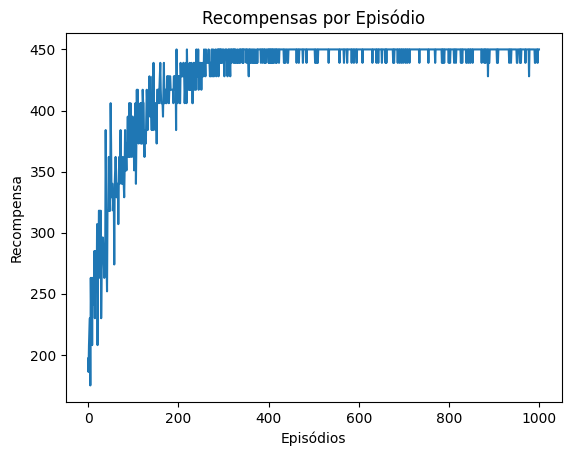

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Definir as variáveis de estados e ações
GLUCOSE_LOW = 0
GLUCOSE_NORMAL = 1
GLUCOSE_HIGH = 2
n_states = 3  # Estados: baixo, normal, alto
n_actions = 3  # Ações: insulina, comer, exercício

# Ações
INSULIN = 0
EAT = 1
EXERCISE = 2

# Definir o ambiente simulado
class DiabetesEnv:
    def __init__(self):
        self.state = random.choice([GLUCOSE_LOW, GLUCOSE_NORMAL, GLUCOSE_HIGH])

    def reset(self):
        # Reiniciar o ambiente com um estado aleatório
        self.state = random.choice([GLUCOSE_LOW, GLUCOSE_NORMAL, GLUCOSE_HIGH])
        return self.state

    def step(self, action):
        # Aplicar insulina reduz o nível de glicose
        if action == INSULIN:
            if self.state == GLUCOSE_HIGH:
                next_state = GLUCOSE_NORMAL
            elif self.state == GLUCOSE_NORMAL:
                next_state = GLUCOSE_LOW
            else:
                next_state = GLUCOSE_LOW  # Não abaixa mais do que o estado baixo

        # Comer aumenta o nível de glicose
        elif action == EAT:
            if self.state == GLUCOSE_LOW:
                next_state = GLUCOSE_NORMAL
            elif self.state == GLUCOSE_NORMAL:
                next_state = GLUCOSE_HIGH
            else:
                next_state = GLUCOSE_HIGH  # Não sobe mais do que o estado alto

        # Fazer exercício reduz glicose
        elif action == EXERCISE:
            if self.state == GLUCOSE_HIGH:
                next_state = GLUCOSE_NORMAL
            elif self.state == GLUCOSE_NORMAL:
                next_state = GLUCOSE_LOW
            else:
                next_state = GLUCOSE_LOW  # Não abaixa mais do que o estado baixo

        # Recompensa por manter os níveis de glicose normais
        if next_state == GLUCOSE_NORMAL:
            reward = 10
        else:
            reward = -1  # Penalidade leve para estados fora do normal

        # Definir se o episódio termina (não vamos terminar aqui)
        done = False

        self.state = next_state
        return next_state, reward, done, {}

# Função para selecionar ação com epsilon-greedy
def select_action(state, q_table, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice([INSULIN, EAT, EXERCISE])  # Explorar (ação aleatória)
    else:
        return np.argmax(q_table[state])  # Exploitar (usar melhor ação conhecida)

# Algoritmo de Q-learning com exibição de passos intermediários e limite de passos por episódio
def q_learning(env, num_episodes=1000, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.99, max_steps_per_episode=100):
    # Inicializar a Q-table
    q_table = np.zeros((n_states, n_actions))

    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0

        for step in range(max_steps_per_episode):
            # Escolher ação
            action = select_action(state, q_table, epsilon)

            # Tomar ação e observar o próximo estado e a recompensa
            next_state, reward, done, _ = env.step(action)

            # Atualizar a Q-table
            q_table[state, action] = q_table[state, action] + alpha * (
                reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

            # Atualizar o estado e a recompensa acumulada
            state = next_state
            total_reward += reward

            if done:
                break

        # Exibir os passos intermediários para acompanhar o treinamento
        if (episode + 1) % 100 == 0:  # Exibe a cada 100 episódios
            print(f"Episode: {episode + 1:5d}  Eps: {epsilon:.4f}  Total Reward: {total_reward:.4f}")

        rewards.append(total_reward)
        epsilon = max(0.01, epsilon * epsilon_decay)  # Decaimento do epsilon

    return q_table, rewards

# Função para plotar recompensas
def plot_rewards(rewards):
    plt.plot(rewards)
    plt.title('Recompensas por Episódio')
    plt.xlabel('Episódios')
    plt.ylabel('Recompensa')
    plt.show()

# Executar o treinamento
if __name__ == '__main__':
    env = DiabetesEnv()
    q_table, rewards = q_learning(env)

    # Exibir a Q-table final
    print("Q-table Final:")
    print(q_table)

    # Plotar recompensas
    plot_rewards(rewards)